# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [24]:
import pandas as pd
import numpy as np
import PIL
import urllib
from pathlib import Path
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import plottable
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image, image # image

In [33]:
DATA_PATH = "predictions/all_predictions.csv"
PLAYERS_TO_INCLUDE = 25 # takes top players sorted by prediction
PLAYERS_PER_PAGE = 10
# NUMBER_OF_PLOTS = math.ceil(PLAYERS_TO_INCLUDE / PLAYERS_PER_PAGE)
BASE_OUT_PATH = "plottable/predictions_plot"

# Data

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
def team_to_logo(team_name):
    if team_name == "Arsenal":
        return "https://resources.premierleague.com/premierleague/badges/70/t3.png"
    if team_name == "Chelsea":
        return "https://resources.premierleague.com/premierleague/badges/70/t8.png"
    if team_name == "Nott'ham Forest":
        return "https://resources.premierleague.com/premierleague/badges/70/t17.png"
    if team_name == "Leicester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t13.png"
    if team_name == "Leeds United":
        return "https://resources.premierleague.com/premierleague/badges/70/t2.png"
    if team_name == "Manchester City":
        return "https://resources.premierleague.com/premierleague/badges/70/t43.png"
    if team_name == "Manchester Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t1.png"
    if team_name == "Tottenham":
        return "https://resources.premierleague.com/premierleague/badges/70/t6.png"
    if team_name == "Newcastle Utd":
        return "https://resources.premierleague.com/premierleague/badges/70/t4.png"
    if team_name == "Aston Villa":
        return "https://resources.premierleague.com/premierleague/badges/70/t7.png"
    if team_name == "Bournemouth":
        return "https://resources.premierleague.com/premierleague/badges/70/t91.png"
    if team_name == "Wolves":
        return "https://resources.premierleague.com/premierleague/badges/70/t39.png"
    if team_name == "Southampton":
        return "https://resources.premierleague.com/premierleague/badges/70/t20.png"
    if team_name == "Fulham":
        return "https://resources.premierleague.com/premierleague/badges/70/t54.png"
    if team_name == "Crystal Palace":
        return "https://resources.premierleague.com/premierleague/badges/70/t31.png"
    if team_name == "Brentford":
        return "https://resources.premierleague.com/premierleague/badges/70/t94.png"
    if team_name == "Everton":
        return "https://resources.premierleague.com/premierleague/badges/70/t11.png"
    if team_name == "Brighton":
        return "https://resources.premierleague.com/premierleague/badges/70/t36.png"
    if team_name == "West Ham":
        return "https://resources.premierleague.com/premierleague/badges/70/t21.png"
    if team_name == "Liverpool":
        return "https://resources.premierleague.com/premierleague/badges/70/t14.png"
    return "https://resources.premierleague.com/premierleague/badges/70/t21.png"

In [6]:
df['Venue'] = np.where(df['Was_home'] == 1, 'H', 'A')

In [7]:
df["Logo_team"] = df["Team"].apply(team_to_logo)
df["Logo_opponent"] = df["Opponent"].apply(team_to_logo)

In [8]:
NEXT_GAMEWEEK = 31
df = df[df["GW"] == NEXT_GAMEWEEK]

In [9]:
df = df.rename(columns={"Pred": "Prediction"}, errors="raise")
df['Prediction'] = df['Prediction'].apply(lambda x: format(round(x, 2), '.2f')).astype("float")

In [10]:
df = df.head(PLAYERS_TO_INCLUDE)

In [11]:
df.columns

Index(['Name', 'GW', 'Season', 'Team', 'Opponent', 'Was_home', 'Team_rating',
       'Opp_rating', 'Pos', 'FPL_points', 'Prediction', 'Venue', 'Logo_team',
       'Logo_opponent'],
      dtype='object')

In [12]:
df["Prediction"].head(10)

7     6.17
15    5.70
24    5.28
29    5.07
32    5.04
38    4.90
47    4.82
48    4.79
50    4.79
55    4.74
Name: Prediction, dtype: float64

In [13]:
df.head()

,Name,GW,Season,Team,Opponent,Was_home,Team_rating,Opp_rating,Pos,FPL_points,Prediction,Venue,Logo_team,Logo_opponent
7,Harry-Kane,31,2022-23,Tottenham,Bournemouth,1.0,1854.798462,1668.258545,FW,2.0,6.17,H,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
15,Leandro-Trossard,31,2022-23,Arsenal,West Ham,0.0,1957.524048,1754.553955,"FW,RM",1.0,5.70,A,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
24,Martinelli,31,2022-23,Arsenal,West Ham,0.0,1957.524048,1754.553955,LW,5.0,5.28,A,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
29,Mohamed-Salah,31,2022-23,Liverpool,Leeds United,0.0,1928.520996,1698.080566,RW,14.0,5.07,A,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...
32,Erling-Haaland,31,2022-23,Manchester City,Leicester City,1.0,2063.473633,1725.040527,FW,12.0,5.04,H,https://resources.premierleague.com/premierlea...,https://resources.premierleague.com/premierlea...


# Plot table

In [14]:
cols = [
    "Name",
    "Logo_team",
    "Team",
    "Logo_opponent",
    "Opponent",
    "Venue",
    "Prediction"
]

In [15]:
df = df[cols]

In [16]:
df = df.set_index("Name")

In [17]:
cmap = LinearSegmentedColormap.from_list(
    name="points_cmap", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=512
)

In [18]:
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"

In [19]:
col_defs = (
    [
        ColumnDefinition(
            name="Name",
            textprops={"ha": "left", "weight": "bold"},
            width=1,
        ),
        ColumnDefinition(
            name="Logo_team",
            title="Team",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Team",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="Logo_opponent",
            title="Opponent",
            textprops={"ha": "left"},
            width=0.1,
            plot_fn=image,
        ),
        ColumnDefinition(
            name="Opponent",
            title="",
            textprops={"ha": "left"},
            width=0.9,
        ),
        ColumnDefinition(
            name="H/A",
            textprops={"ha": "center"},
            width=0.25,
        ),
        ColumnDefinition(
            name="Prediction",
            textprops={"ha": "center", "weight": "bold"},
            width=0.6,
            cmap=normed_cmap(df["Prediction"], cmap=cmap)
        )
    ]
)

# Saving plots

C:\users\user\appdata\local\programs\python\python38\lib\site-packages\plottable\plots.py:23: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread(path)


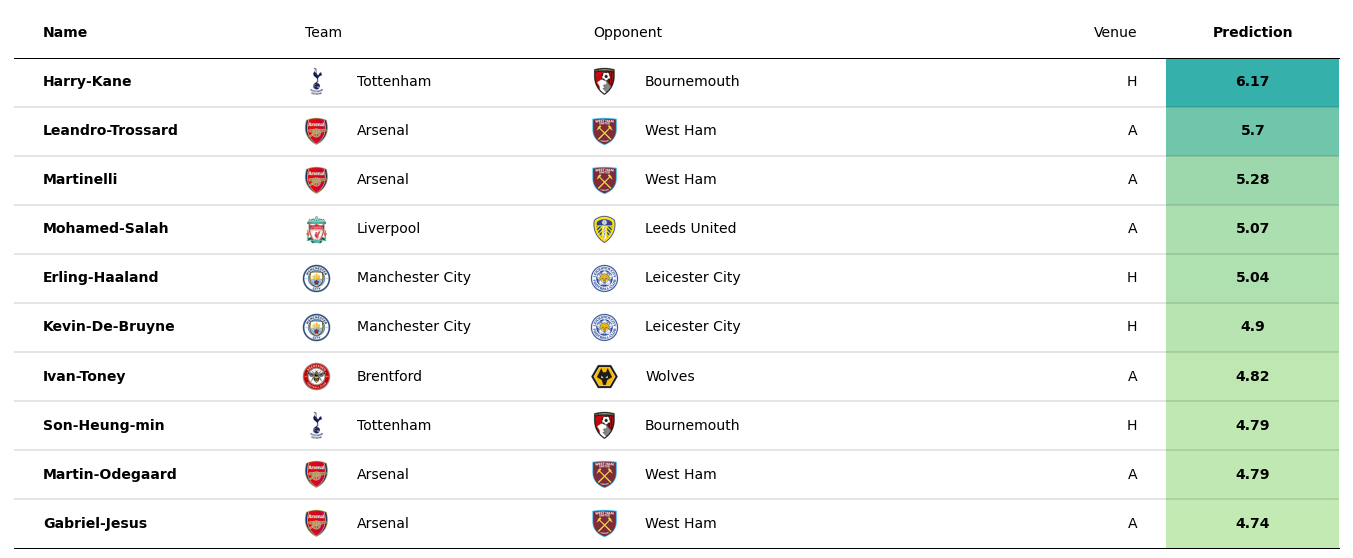

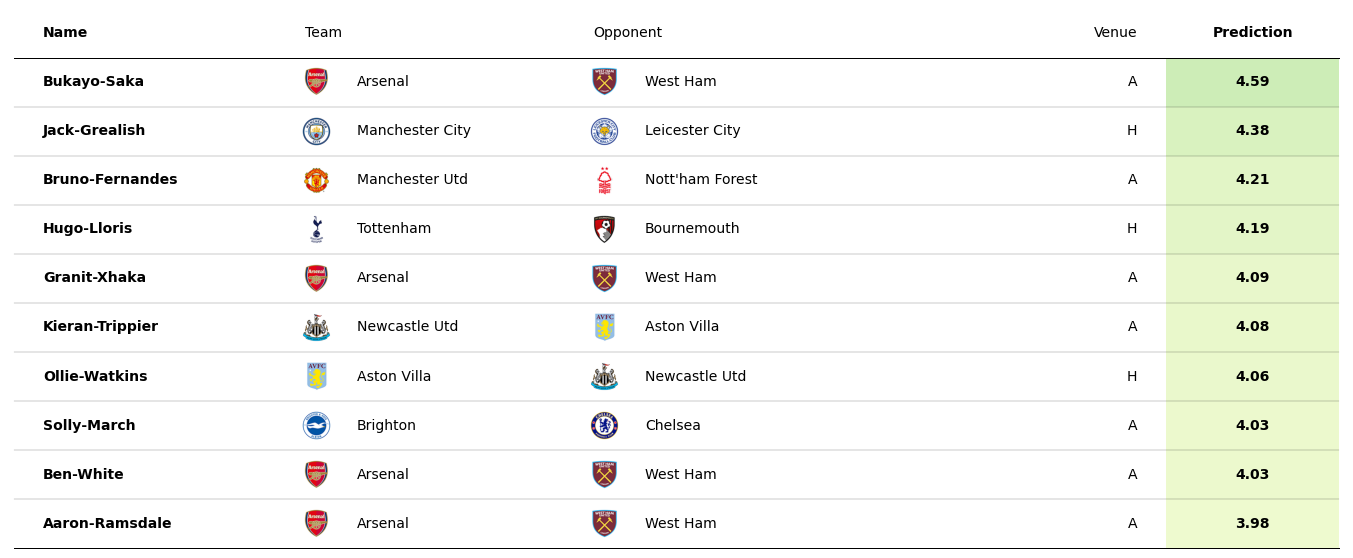

In [20]:
l = 0
p = PLAYERS_PER_PAGE
i = 1

while p <= PLAYERS_TO_INCLUDE:
    fig, ax = plt.subplots(figsize=(24, (PLAYERS_PER_PAGE / 24) * 24))

    table = Table(
        df[l:p],
        column_definitions=col_defs,
        row_dividers=True,
        footer_divider=True,
        ax=ax,
        textprops={"fontsize": 14},
        col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
        column_border_kw={"linewidth": 1, "linestyle": "-"},
    )

    # saving plot
    fig.savefig(BASE_OUT_PATH + f"_{i}.png", facecolor=ax.get_facecolor(), dpi=200)
    
    l += PLAYERS_PER_PAGE
    p += PLAYERS_PER_PAGE
    i += 1

In [21]:
# fig, ax = plt.subplots(figsize=(24, (PLAYERS_PER_PAGE / 24) * 24))

# table = Table(
#     df[0:10],
#     column_definitions=col_defs,
#     row_dividers=True,
#     footer_divider=True,
#     ax=ax,
#     textprops={"fontsize": 14},
#     col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
#     column_border_kw={"linewidth": 1, "linestyle": "-"},
# )

# # saving plot
# fig.savefig(OUT_PATH, facecolor=ax.get_facecolor(), dpi=200)